In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df =pd.read_excel('Train_dataset.xlsx')

print(df.info())
print('')
print(df['Index'].value_counts())
print('')
print(df['Industry'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7345 non-null   float64
 4   General Index         7321 non-null   float64
 5   NAV                   7322 non-null   float64
 6   P/E Ratio             7149 non-null   float64
 7   Volumes Traded        7115 non-null   float64
 8   Inventory Turnover    6984 non-null   float64
 9   Covid Impact (Beta)   7007 non-null   float64
 10  Tracking Error        7312 non-null   float64
 11  Dollar Exchange Rate  7306 non-null   float64
 12  Put-Call Ratio        7298 non-null   float64
 13  P/B Ratio             7358 non-null   float64
 14  Stock Price           7383 non-null   float64
dtypes: float64(12), objec

In [2]:
print(df['General Index'].value_counts())

11270.15    1485
55722.00    1464
3351.28     1461
12765.84    1458
38182.08    1453
Name: General Index, dtype: int64


In [3]:
df1 = df.select_dtypes(include = 'float')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VWAP                  7345 non-null   float64
 1   General Index         7321 non-null   float64
 2   NAV                   7322 non-null   float64
 3   P/E Ratio             7149 non-null   float64
 4   Volumes Traded        7115 non-null   float64
 5   Inventory Turnover    6984 non-null   float64
 6   Covid Impact (Beta)   7007 non-null   float64
 7   Tracking Error        7312 non-null   float64
 8   Dollar Exchange Rate  7306 non-null   float64
 9   Put-Call Ratio        7298 non-null   float64
 10  P/B Ratio             7358 non-null   float64
 11  Stock Price           7383 non-null   float64
dtypes: float64(12)
memory usage: 692.3 KB
None


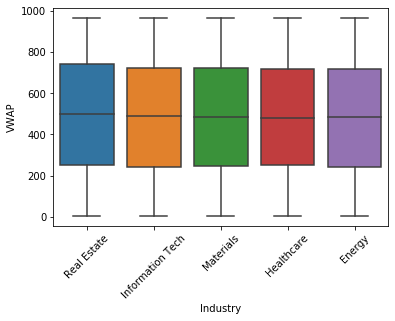

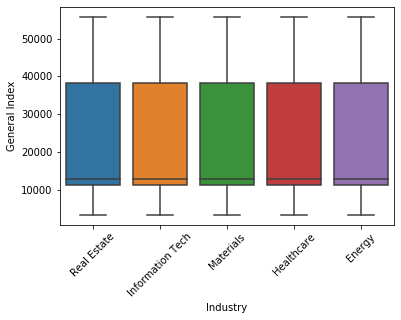

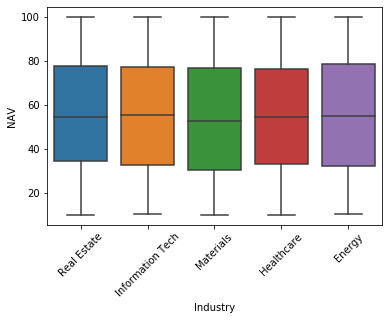

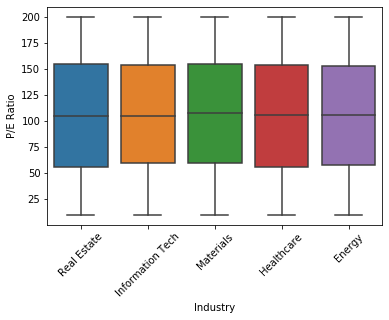

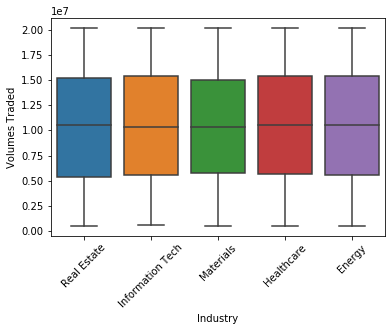

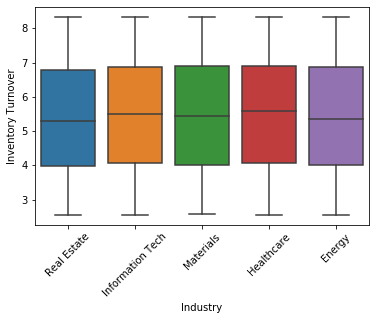

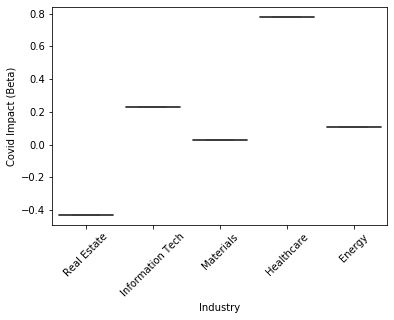

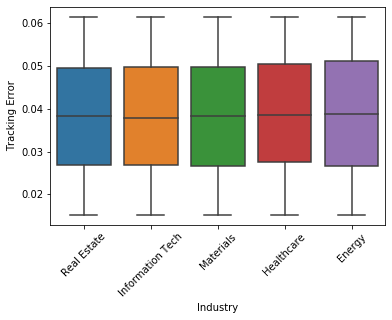

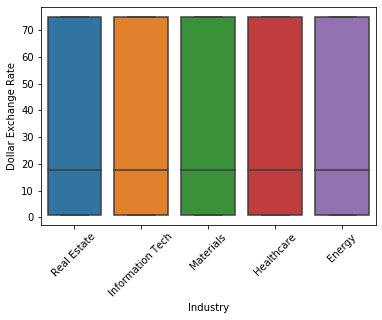

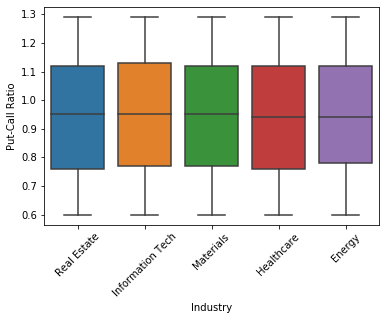

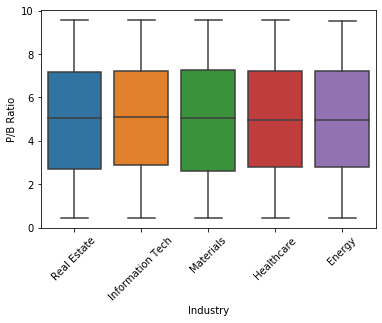

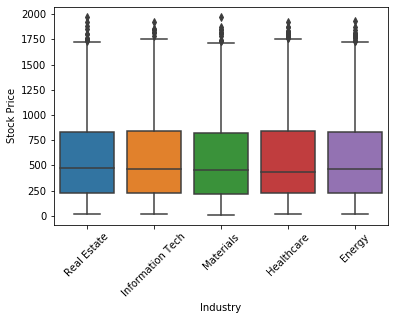

In [4]:
index = df.Index.unique()
industry = df.Industry.unique()

for column in df1:
    plt.figure()
    ax = sns.boxplot(x =df['Industry'], y = df1[column], data=df1)
    plt.setp(ax.get_xticklabels(), rotation=45)

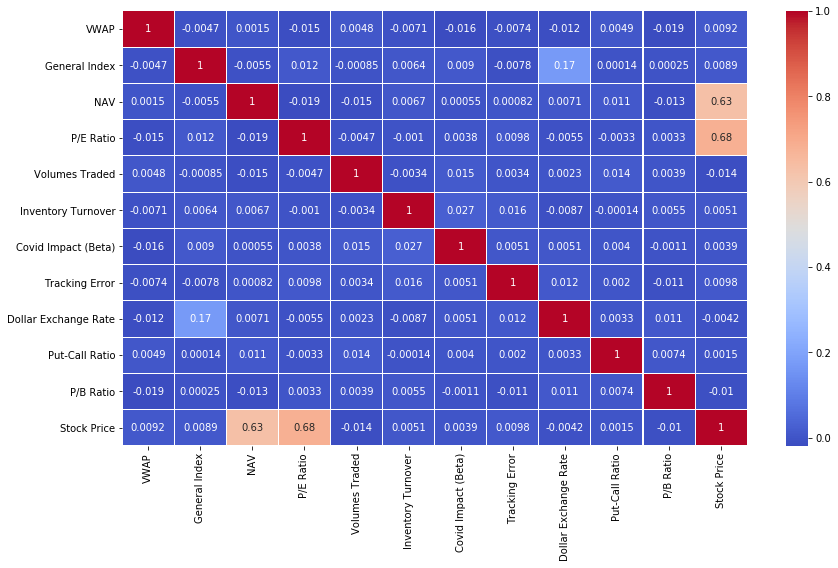

In [5]:
#Finding out correlation between numerical quantities
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm',linewidths = .1)

In [6]:
#Carrying out one-hot encoding on Index and Industry

index_code = pd.get_dummies(df['Index'])

print(index_code)
print("")

ind_code = pd.get_dummies(df['Industry'])
print(ind_code) 
print("")

df = pd.concat([df, ind_code, index_code],axis = 1)

print(df.info())

      BSE  JSE  NSE  NYSE  S&P 500
0       0    0    0     1        0
1       0    0    0     1        0
2       0    0    0     1        0
3       1    0    0     0        0
4       0    0    0     0        1
...   ...  ...  ...   ...      ...
7378    0    0    1     0        0
7379    0    1    0     0        0
7380    0    1    0     0        0
7381    0    0    0     0        1
7382    0    0    0     0        1

[7383 rows x 5 columns]

      Energy  Healthcare  Information Tech  Materials  Real Estate
0          0           0                 0          0            1
1          0           0                 1          0            0
2          0           0                 1          0            0
3          0           0                 0          1            0
4          0           0                 0          0            1
...      ...         ...               ...        ...          ...
7378       0           1                 0          0            0
7379       0      

In [7]:
#Filling missing values - data cleaning
colmns = ['VWAP','NAV','P/E Ratio','Volumes Traded','Inventory Turnover','Tracking Error','Put-Call Ratio','P/B Ratio']

for colmn in colmns:
  df[colmn] = df[colmn].fillna(df[colmn].mean())

In [8]:
df.loc[df['Index'] == 'NYSE', 'General Index'] = 12765.84
df.loc[df['Index'] == 'BSE', 'General Index'] =  38182.08
df.loc[df['Index'] == 'JSE', 'General Index'] = 55722
df.loc[df['Index'] == 'S&P 500', 'General Index'] = 3351.28
df.loc[df['Index'] == 'NSE', 'General Index'] = 11270.15


df.loc[df['Industry'] == 'Real Estate','Covid Impact (Beta)'] = -0.43
df.loc[df['Industry'] == 'Information Tech','Covid Impact (Beta)'] = 0.23
df.loc[df['Industry'] == 'Materials','Covid Impact (Beta)'] = 0.03
df.loc[df['Industry'] == 'Healthcare','Covid Impact (Beta)'] = 0.78
df.loc[df['Industry'] == 'Energy','Covid Impact (Beta)'] = 0.11

df.loc[df['Index'] == 'NYSE','Dollar Exchange Rate'] = 1
df.loc[df['Index'] == 'BSE','Dollar Exchange Rate'] = 74.9
df.loc[df['Index'] == 'JSE','Dollar Exchange Rate'] = 17.7
df.loc[df['Index'] == 'S&P 500','Dollar Exchange Rate'] = 1
df.loc[df['Index'] == 'NSE','Dollar Exchange Rate'] = 74.9

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7383 non-null   float64
 4   General Index         7383 non-null   float64
 5   NAV                   7383 non-null   float64
 6   P/E Ratio             7383 non-null   float64
 7   Volumes Traded        7383 non-null   float64
 8   Inventory Turnover    7383 non-null   float64
 9   Covid Impact (Beta)   7383 non-null   float64
 10  Tracking Error        7383 non-null   float64
 11  Dollar Exchange Rate  7383 non-null   float64
 12  Put-Call Ratio        7383 non-null   float64
 13  P/B Ratio             7383 non-null   float64
 14  Stock Price           7383 non-null   float64
 15  Energy               

In [9]:
df =df.drop(['Industry','Index'],axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   VWAP                  7383 non-null   float64
 2   General Index         7383 non-null   float64
 3   NAV                   7383 non-null   float64
 4   P/E Ratio             7383 non-null   float64
 5   Volumes Traded        7383 non-null   float64
 6   Inventory Turnover    7383 non-null   float64
 7   Covid Impact (Beta)   7383 non-null   float64
 8   Tracking Error        7383 non-null   float64
 9   Dollar Exchange Rate  7383 non-null   float64
 10  Put-Call Ratio        7383 non-null   float64
 11  P/B Ratio             7383 non-null   float64
 12  Stock Price           7383 non-null   float64
 13  Energy                7383 non-null   uint8  
 14  Healthcare            7383 non-null   uint8  
 15  Information Tech     

In [10]:
X = df.drop(['Stock Price','Stock Index'],axis = 1)
y = df['Stock Price']
print(X)

            VWAP  General Index    NAV   P/E Ratio  Volumes Traded  \
0     700.290000       12765.84  32.38   45.350000       1208599.0   
1     214.520000       12765.84  33.25  170.560000      13753356.0   
2     943.420000       12765.84  88.27  143.580000       6892003.0   
3     828.130000       38182.08  73.66  151.760000       8316793.0   
4     486.188167        3351.28  23.79  105.543623       3943312.0   
...          ...            ...    ...         ...             ...   
7378  773.910000       11270.15  40.28   61.370000      19212221.0   
7379   61.970000       55722.00  79.56   62.900000       8108942.0   
7380  131.990000       55722.00  26.16  198.770000       8382586.0   
7381  643.720000        3351.28  29.24   38.830000      18638400.0   
7382  126.460000        3351.28  23.30  105.830000      14707806.0   

      Inventory Turnover  Covid Impact (Beta)  Tracking Error  \
0                   5.05                -0.43          0.0520   
1                   3.10     

2682.064753714651 2
0.985071774853347 2
1960.7259487275453 3
0.9890867070330981 3
1511.5890731836937 4
0.9915865782202111 4
1384.2745765357497 5
0.9922952037176982 5
1262.429872494248 6
0.9929733846498847 6
1133.0057814645397 7
0.9936937520338625 7
1025.7659523994394 8
0.9942906430338859 8
967.5828560666258 9
0.994614486953233 9
930.0749876931063 10
0.9948232536890381 10
882.3076372972603 11
0.99508912413843 11
883.4713066237197 12
0.9950826472188562 12
862.6855292747185 13
0.995198339714231 13
883.2077157711744 14
0.9950841143510676 14
901.399774089994 15
0.9949828583533933 15
887.3769863567784 16
0.9950609084199233 16
890.6393948498927 17
0.9950427500333899 17
875.8514304798802 18
0.9951250590310644 18
867.7326133310044 19
0.9951702479215098 19
831.5871060954966 20
0.9953714318300281 20
827.1177118112406 21
0.9953963082331992 21
828.8977993446697 22
0.9953864003637329 22
825.03188360086 23
0.9954079178384851 23
818.3204131670856 24
0.9954452735143918 24
811.0318296865513 25
0.9954858

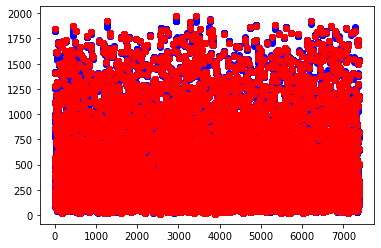

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
for i in range(2,100):
  regressor = RandomForestRegressor(n_estimators = i, random_state = 56)
  regressor.fit(X, y)  
  y_pred = regressor.predict(X)
  print(mean_squared_error(y,y_pred),i)
  print(r2_score(y,y_pred),i)
  plt.plot(pd.DataFrame(y_pred) , "bo")
  plt.plot(y.reset_index(drop=True),'ro')
  plt.show

In [12]:
#Running the model on Test CSV File

df2 = pd.read_csv('Test_dataset.csv')

print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           3331 non-null   object 
 1   Index                 3331 non-null   object 
 2   Industry              3331 non-null   object 
 3   VWAP                  3319 non-null   float64
 4   General Index         3060 non-null   float64
 5   NAV                   3056 non-null   float64
 6   P/E Ratio             3039 non-null   float64
 7   Volumes Traded        3283 non-null   float64
 8   Inventory Turnover    3301 non-null   float64
 9   Covid Impact (Beta)   3300 non-null   float64
 10  Tracking Error        3205 non-null   float64
 11  Dollar Exchange Rate  3188 non-null   float64
 12  Put-Call Ratio        2902 non-null   float64
 13  P/B Ratio             3193 non-null   float64
dtypes: float64(11), object(3)
memory usage: 364.5+ KB
None


In [13]:
index_code = pd.get_dummies(df2['Index'])

print(index_code)
print("")

ind_code = pd.get_dummies(df2['Industry'])
print(ind_code) 
print("")

df2 = pd.concat([df2, ind_code, index_code],axis = 1)

print(df2.info())

      BSE  JSE  NSE  NYSE  S&P 500
0       0    0    1     0        0
1       0    1    0     0        0
2       0    0    0     0        1
3       0    0    1     0        0
4       0    0    0     1        0
...   ...  ...  ...   ...      ...
3326    0    0    1     0        0
3327    1    0    0     0        0
3328    0    0    1     0        0
3329    1    0    0     0        0
3330    0    0    0     1        0

[3331 rows x 5 columns]

      Energy  Healthcare  Information Tech  Materials  Real Estate
0          0           0                 0          1            0
1          1           0                 0          0            0
2          0           0                 1          0            0
3          0           1                 0          0            0
4          0           0                 0          1            0
...      ...         ...               ...        ...          ...
3326       1           0                 0          0            0
3327       1      

In [14]:
#Filling missing values - data cleaning
colmns = ['VWAP','NAV','P/E Ratio','Volumes Traded','Inventory Turnover','Tracking Error','Put-Call Ratio','P/B Ratio']

for colmn in colmns:
  df2[colmn] = df2[colmn].fillna(df2[colmn].mean())

df2.loc[df2['Index'] == 'NYSE', 'General Index'] = 12765.84
df2.loc[df2['Index'] == 'BSE', 'General Index'] =  38182.08
df2.loc[df2['Index'] == 'JSE', 'General Index'] = 55722
df2.loc[df2['Index'] == 'S&P 500', 'General Index'] = 3351.28
df2.loc[df2['Index'] == 'NSE', 'General Index'] = 11270.15


df2.loc[df2['Industry'] == 'Real Estate','Covid Impact (Beta)'] = -0.43
df2.loc[df2['Industry'] == 'Information Tech','Covid Impact (Beta)'] = 0.23
df2.loc[df2['Industry'] == 'Materials','Covid Impact (Beta)'] = 0.03
df2.loc[df2['Industry'] == 'Healthcare','Covid Impact (Beta)'] = 0.78
df2.loc[df2['Industry'] == 'Energy','Covid Impact (Beta)'] = 0.11

df2.loc[df2['Index'] == 'NYSE','Dollar Exchange Rate'] = 1
df2.loc[df2['Index'] == 'BSE','Dollar Exchange Rate'] = 74.9
df2.loc[df2['Index'] == 'JSE','Dollar Exchange Rate'] = 17.7
df2.loc[df2['Index'] == 'S&P 500','Dollar Exchange Rate'] = 1
df2.loc[df2['Index'] == 'NSE','Dollar Exchange Rate'] = 74.9

In [15]:
df2 =df2.drop(['Industry','Index'],axis=1)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           3331 non-null   object 
 1   VWAP                  3331 non-null   float64
 2   General Index         3331 non-null   float64
 3   NAV                   3331 non-null   float64
 4   P/E Ratio             3331 non-null   float64
 5   Volumes Traded        3331 non-null   float64
 6   Inventory Turnover    3331 non-null   float64
 7   Covid Impact (Beta)   3331 non-null   float64
 8   Tracking Error        3331 non-null   float64
 9   Dollar Exchange Rate  3331 non-null   float64
 10  Put-Call Ratio        3331 non-null   float64
 11  P/B Ratio             3331 non-null   float64
 12  Energy                3331 non-null   uint8  
 13  Healthcare            3331 non-null   uint8  
 14  Information Tech      3331 non-null   uint8  
 15  Materials            

In [16]:
X = df2.drop(['Stock Index'],axis = 1)
print(X)

        VWAP  General Index        NAV   P/E Ratio  Volumes Traded  \
0      53.30       11270.15  44.590000  185.090000    1.206786e+07   
1     749.34       55722.00  74.200000   34.010000    6.172474e+06   
2     567.75        3351.28  88.410000  177.400000    1.747249e+07   
3     646.78       11270.15  79.360000  105.440000    1.555316e+07   
4     380.33       12765.84  19.900000  139.400000    1.252578e+07   
...      ...            ...        ...         ...             ...   
3326  121.58       11270.15  11.930000  122.280000    1.403440e+07   
3327  692.25       38182.08  54.257196  104.731629    1.018308e+07   
3328  911.37       11270.15  54.257196  104.731629    1.018308e+07   
3329  479.38       38182.08  20.520000  176.890000    3.069831e+06   
3330  431.43       12765.84  76.460000  172.700000    1.235886e+07   

      Inventory Turnover  Covid Impact (Beta)  Tracking Error  \
0               2.780000                 0.03          0.0330   
1               6.780000     

In [23]:
df2['Stock Price'] = " "
y = df2['Stock Price']

#for i in range(2,100):
  #regressor = RandomForestRegressor(n_estimators = i, random_state = 56)
y = regressor.predict(X)
  #print(mean_squared_error(y,y_pred),i)print(r2_score(y,y_pred),i)
print(y)

df2['Stock Price'] = y

[ 803.78130595  255.0305845  1555.71415466 ...  519.21541412  352.36189648
 1304.89992768]


In [24]:
df = df2[['Stock Index','Stock Price']]
print(df)
df.to_csv('01.csv')

     Stock Index  Stock Price
0         AC3235   803.781306
1         AC3236   255.030585
2         AC3237  1555.714155
3         AC3238   799.824633
4         AC3239   268.689296
...          ...          ...
3326      AD2734   139.461222
3327      AD2735   634.121433
3328      AD2736   519.215414
3329      AD2737   352.361896
3330      AD2738  1304.899928

[3331 rows x 2 columns]
